In [63]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from time import time, sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [46]:
# Defining the function and creating csv

def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '73c68ca4-cd9c-4b23-842b-39c5102f9d95',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    if not os.path.isfile(r'C:\Users\r.mistyakov\PycharmProjects\edProj\Data Analyst Bootcamp\API.csv'):
        df.to_csv(r'C:\Users\r.mistyakov\PycharmProjects\edProj\Data Analyst Bootcamp\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\r.mistyakov\PycharmProjects\edProj\Data Analyst Bootcamp\API.csv', mode='a', header=False)
        

In [50]:
# Using the function to fill csv with data

for i in range(1000):
    api_runner()
    print('API Runner completed')
    sleep(60)

exit()

C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\cov9\Miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [87]:
# Getting info from csv

df2 = pd.read_csv(r'C:\Users\r.mistyakov\PycharmProjects\edProj\Data Analyst Bootcamp\API.csv')
df2 = df2.drop(columns=['Unnamed: 0'], axis=1)
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10166,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19350581.00000,19350581.00000,False,NaN,1,NaN,NaN,NaN,2023-04-19T14:08:00.000Z,29390.44279,22527974804.75802,26.13070,0.59486,-3.02599,-2.78873,4.82111,19.64439,41.47410,568722143772.05566,46.17720,617199298523.04004,NaN,2023-04-19T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 14:10:19.184644
1,1027,Ethereum,ETH,ethereum,6743,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119344051.00320,119344051.00320,False,NaN,2,NaN,NaN,NaN,2023-04-19T14:08:00.000Z,1991.44539,12054614056.06199,37.77640,0.67482,-5.40950,4.32471,12.47635,17.53198,30.62941,237667160018.25720,19.28790,237667160018.26001,NaN,2023-04-19T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 14:10:19.184644
2,825,Tether,USDT,tether,51500,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81061272678.94568,84091735571.79916,False,NaN,3,NaN,NaN,NaN,2023-04-19T14:08:00.000Z,1.00035,38997089484.44589,25.84120,0.02653,0.01257,-0.04752,-0.20947,0.01023,0.03544,81089854404.60358,6.58670,84121385820.75999,NaN,2023-04-19T14:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-19 14:10:19.184644
3,1839,BNB,BNB,bnb,1268,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865095.57914,155865095.57914,False,NaN,4,NaN,NaN,NaN,2023-04-19T14:08:00.000Z,328.17003,802321310.93269,6.96690,0.66940,-4.63790,2.34241,-2.75081,3.69618,13.63950,51150253663.43129,4.15310,51150253663.43000,NaN,2023-04-19T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 14:10:19.184644
4,3408,USD Coin,USDC,usd-coin,11894,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31371462790.30083,31371462790.30083,False,NaN,5,NaN,NaN,NaN,2023-04-19T14:08:00.000Z,0.99994,5595420506.67524,40.72560,0.00480,-0.00097,-0.00270,0.04749,-0.00105,-0.00742,31369644090.76552,2.54810,31369644090.77000,NaN,2023-04-19T14:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-19 14:10:19.184644
5,52,XRP,XRP,xrp,933,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,NaN,2023-04-19T14:08:00.000Z,0.49818,1898093285.94703,88.92230,0.32625,-4.31398,-1.40452,30.52964,26.46998,27.64919,25781398258.93193,2.09700,49818346941.08000,NaN,2023-04-19T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 14:10:19.184644
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34784697030.81400,35694617077.12100,False,NaN,7,NaN,NaN,NaN,2023-04-19T14:08:00.000Z,0.42338,491303206.05581,44.41470,1.01755,-4.64085,5.18502,23.86173,5.66125,27.93952,14727092729.85138,1.19620,19052032342.16000,NaN,2023-04-19T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 14:10:19.184644
7,74,Dogecoin,DOGE,dogecoin,690,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139002536383.70523,139002536383.70523,False,NaN,8,NaN,NaN,NaN,2023-04-19T14:08:00.000Z,0.09029,1030707486.44096,29.66890,2.40687,-3.29965,9.21556,22.32766,3.22735,11.92531,12549915461.79622,1.01940,12549915461.80000,NaN,2023-04-19T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN

In [90]:
# Creating df with average percent changing of cryptos

df3 = df2.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.68733,-2.91271,-2.49616,5.14441,19.80508,41.79622
Ethereum,0.75604,-5.26681,4.64099,12.79876,17.66904,30.94576
Tether,0.03618,0.02188,-0.01842,-0.19434,0.02555,0.05209
BNB,0.76400,-4.46791,2.51158,-2.48352,3.82998,13.99127
USD Coin,0.00799,0.00329,0.02239,0.04915,0.00180,0.00253
XRP,0.48725,-4.16669,-1.31198,30.94937,26.55295,28.22131
Cardano,1.09081,-4.52821,5.11037,24.29934,5.70272,28.26047
Dogecoin,3.15188,-2.47268,10.09467,23.65407,4.02741,13.18399
Polygon,0.80816,-4.45862,1.05486,-1.75197,-26.42313,20.71152


In [108]:
# Transforming data

df4 = df3.stack().to_frame(name='values')

index = pd.Index(range(90))
df5 = df4.set_index(index)
df5 = df4.reset_index()

vis_data = df5.rename(columns={'level_1': 'percent_change'})
vis_data['percent_change'] = vis_data['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
vis_data['percent_change'] = vis_data['percent_change'].replace(['quote.USD.percent_change_24h'],['24h'])
vis_data['percent_change'] = vis_data['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
vis_data['percent_change'] = vis_data['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
vis_data['percent_change'] = vis_data['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
vis_data['percent_change'] = vis_data['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])

,name,percent_change,values
0,Bitcoin,1h,0.68733
1,Bitcoin,24h,-2.91271
2,Bitcoin,7d,-2.49616
3,Bitcoin,30d,5.14441
4,Bitcoin,60d,19.80508
5,Bitcoin,90d,41.79622
6,Ethereum,1h,0.75604
7,Ethereum,24h,-5.26681
8,Ethereum,7d,4.64099
9,Ethereum,30d,12.79876


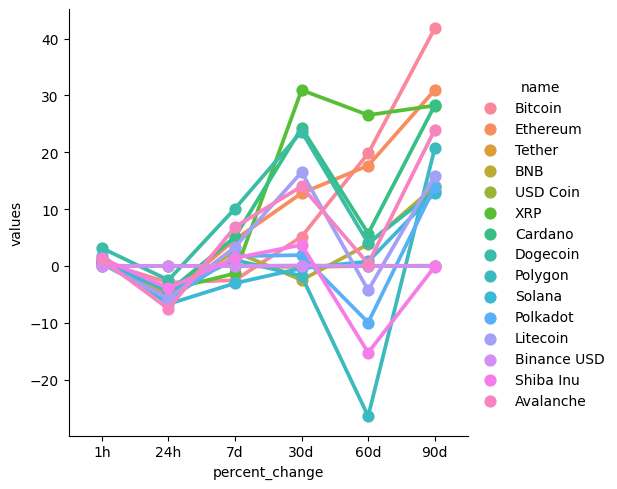

In [109]:
# Creating catplot

sns.catplot(x='percent_change', y='values', hue='name', data=vis_data, kind='point')

In [121]:
# Creating another df of prices of Bitcoin by time

vis_data2 = df2[['name', 'quote.USD.price', 'timestamp']].query("name == 'Bitcoin'")
vis_data2 = vis_data2.rename(columns={'quote.USD.price': 'price'})
vis_data2['timestamp'] = pd.to_datetime(vis_data2['timestamp'])

<AxesSubplot:xlabel='timestamp', ylabel='price'>

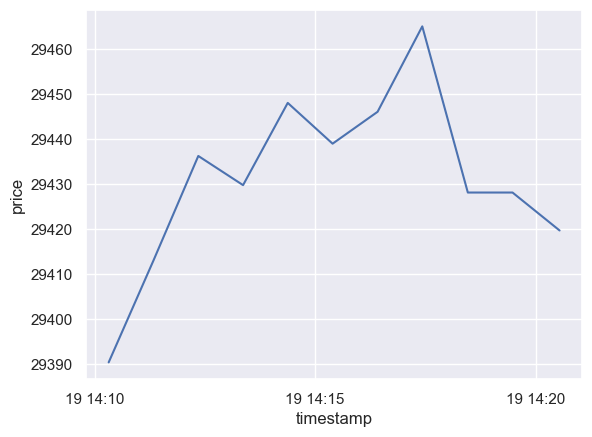

In [129]:
# Visualizating second df

sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='price', data=vis_data2)